In [1]:
%matplotlib notebook
import mne
import os 
import matplotlib.pyplot as plt
import numpy as np 

fname = "oddball_example_small-fif.gz"

## importing data 

In [2]:

raw = mne.io.read_raw_fif(fname)


Opening raw data file oddball_example_small-fif.gz...
Isotrak not found


C:\Users\surya\AppData\Local\Temp\ipykernel_6760\441531944.py:1: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname)


    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.


In [3]:
# mne.io.read use to load the data in raw variable 
raw = mne.io.read_raw_fif('oddball_example_small-fif.gz', preload=True)

Opening raw data file oddball_example_small-fif.gz...
Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


C:\Users\surya\AppData\Local\Temp\ipykernel_6760\604189215.py:2: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('oddball_example_small-fif.gz', preload=True)


In [4]:
raw

<Raw | oddball_example_small-fif.gz, 64 x 109098 (1091.0 s), ~53.3 MB, data loaded>

In [5]:
raw.load_data()

<Raw | oddball_example_small-fif.gz, 64 x 109098 (1091.0 s), ~53.3 MB, data loaded>

In [6]:
# for the raw data info 

n_time_samps = raw.n_times
time_secs = raw.times
ch_names = raw.ch_names
n_chan = len(ch_names)  # note: there is no raw.n_channels attribute
print(
    f"the (cropped) sample data object has {n_time_samps} time samples and "
    f"{n_chan} channels."
)
print(f"The last time sample is at {time_secs[-1]} seconds.")
print("The first few channel names are {}.".format(", ".join(ch_names[:3])))
print()  # insert a blank line in the output

# some examples of raw.info:
print("bad channels:", raw.info["bads"])  # chs marked "bad" during acquisition
print(raw.info["sfreq"], "Hz")  # sampling frequency
print(raw.info["description"], "\n")  # miscellaneous acquisition info

print(raw.info)

the (cropped) sample data object has 109098 time samples and 64 channels.
The last time sample is at 1090.97 seconds.
The first few channel names are FP1, FP2, F7.

bad channels: []
100.0 Hz
None 

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 Stimulus
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>


In [7]:
#Time, sample number, and sample index
print(raw.time_as_index(20))
print(raw.time_as_index([20, 30, 40]), "\n")

print(np.diff(raw.time_as_index([1, 2, 3])))

[2000]
[2000 3000 4000] 

[100 100]


In [8]:
# Selecting, dropping, and reordering channels
eeg_and_eog = raw.copy().pick(picks=["eeg", "eog"])
print(len(raw.ch_names), "→", len(eeg_and_eog.ch_names))

64 → 63


In [9]:
raw.ch_names

['FP1',
 'FP2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'PO9',
 'O1',
 'Oz',
 'O2',
 'PO10',
 'AF7',
 'AF3',
 'AF4',
 'AF8',
 'F5',
 'F1',
 'F2',
 'F6',
 'SO1',
 'FT7',
 'FC3',
 'FC4',
 'FT8',
 'SO2',
 'C5',
 'C1',
 'C2',
 'C6',
 'TP7',
 'CP3',
 'CPz',
 'CP4',
 'TP8',
 'P5',
 'P1',
 'P2',
 'P6',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'STI 014',
 'FCz']

In [10]:
raw_temp = raw.copy()
print("Number of channels in raw_temp:")
print(len(raw_temp.ch_names), end=" → drop two → ")
raw_temp.drop_channels(["Fz", "F4"])

Number of channels in raw_temp:
64 → drop two → 

<Raw | oddball_example_small-fif.gz, 62 x 109098 (1091.0 s), ~51.7 MB, data loaded>

In [11]:
print(len(raw_temp.ch_names), end=" → pick three → ")
raw_temp.pick(["T7", "SO2", "CP5"])
print(len(raw_temp.ch_names))

62 → pick three → 3


In [12]:
print(raw.ch_names[-3:])
channel_renaming_dict = {name: name.replace(" ", "_") for name in raw.ch_names}
raw.rename_channels(channel_renaming_dict)
print(raw.ch_names[-3:])

['PO8', 'STI 014', 'FCz']
['PO8', 'STI_014', 'FCz']


# 

## Extracting data from Raw objects

In [13]:
sampling_freq = raw.info["sfreq"]
start_stop_seconds = np.array([11, 13])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
print(raw_selection)

(array([[-4.83043732e-05, -4.48123908e-05, -3.96957627e-05,
        -4.20495874e-05, -4.99739028e-05, -5.19662172e-05,
        -4.87090241e-05, -4.55079723e-05, -4.13979584e-05,
        -3.95437941e-05, -4.29375104e-05, -4.55681329e-05,
        -4.32693668e-05, -3.96379305e-05, -3.95521789e-05,
        -4.24566219e-05, -4.17724520e-05, -3.72917892e-05,
        -3.66720493e-05, -3.83865909e-05, -3.77992989e-05,
        -4.02628828e-05, -4.37152840e-05, -3.88614956e-05,
        -3.39029769e-05, -3.90561885e-05, -4.35393980e-05,
        -4.01492877e-05, -3.91066429e-05, -4.28970473e-05,
        -4.22261429e-05, -3.64487734e-05, -3.32049186e-05,
        -3.46384977e-05, -3.68219864e-05, -3.64519603e-05,
        -3.37789539e-05, -3.26558661e-05, -3.58991185e-05,
        -3.96814785e-05, -3.95839196e-05, -3.88231251e-05,
        -4.06661339e-05, -4.14383022e-05, -3.83465033e-05,
        -3.37443145e-05, -3.14283422e-05, -3.35788854e-05,
        -3.69629770e-05, -3.81166063e-05, -4.09724808e-

In [14]:
x = raw_selection[1]
y = raw_selection[0].T

In [15]:
len(x)

200

In [16]:
len(y)

200

In [17]:
plt.plot(x,y)

<IPython.core.display.Javascript object>

# Extracting channels by name

In [18]:
channel_names = ["PO10", "AF3"]
two_meg_chans = raw[channel_names, start_sample:stop_sample]
y_offset = np.array([5e-11, 0])  # just enough to separate the channel traces
x = two_meg_chans[1]
y = two_meg_chans[0].T + y_offset
lines = plt.plot(x, y)
plt.legend(lines, channel_names)

In [19]:
eeg_channel_indices = mne.pick_types(raw.info, meg=False, eeg=True)
eeg_data, times = raw[eeg_channel_indices]
print(eeg_data.shape)

(63, 109098)


In [20]:
data = raw.get_data()
print(data.shape)

(64, 109098)


In [21]:
data, times = raw.get_data(return_times=True)
#print(data.shape)
print(times.shape)

(109098,)


In [22]:
data = raw.get_data()
np.save(file="my_data.npy", arr=data)

## Event marking 

In [23]:
import os
import mne

# Define the path to the sample dataset
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(
    sample_data_folder, "MEG", "sample", "sample_audvis_raw.fif"
)

# Load the raw data file
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)

# Pick only the EEG channels
raw.pick_types(meg=False, eeg=True)

# Crop the data to the first 60 seconds and load it into RAM
raw.crop(tmax=60).load_data()

# Print basic information about the cropped data
print(raw.info)
print("Cropped data duration (seconds):", raw.times[-1])


Opening raw data file C:\Users\surya\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


C:\Users\surya\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
<Info | 19 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 59 EEG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 59
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: []
 sfreq: 600.6 Hz
>
Cropped data duration (seconds): 60.000167471573526


In [24]:
events = mne.find_events(raw, stim_channel="EEG 004")

In [25]:
#subselecting and combining the data
mne.find_events(raw, stim_channel="EEG 004")

array([], shape=(0, 3), dtype=int32)

In [26]:
# no event in data 
#events_no_button = mne.pick_events(events, exclude=32)

Using matplotlib as 2D backend.


<IPython.core.display.Javascript object>


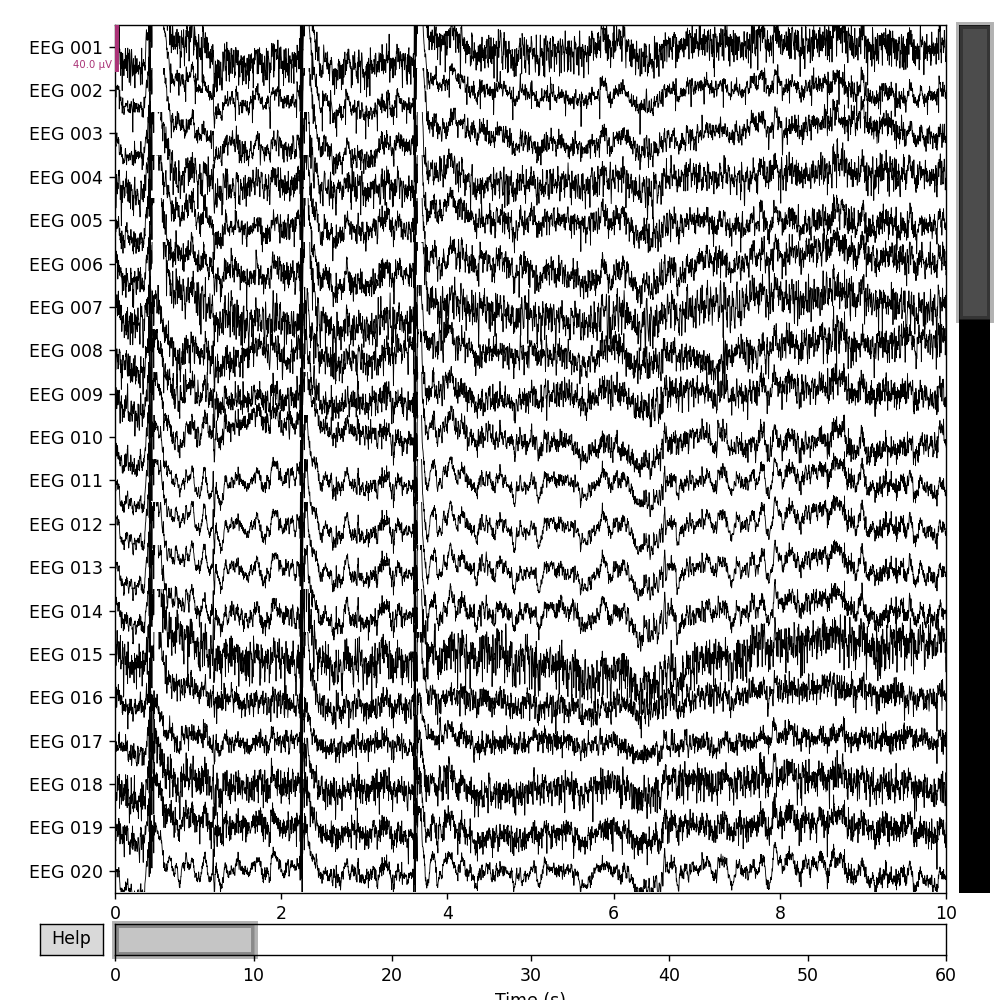

In [27]:
raw.plot();

## Plotting spectral density of continuous data

Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


<IPython.core.display.Javascript object>


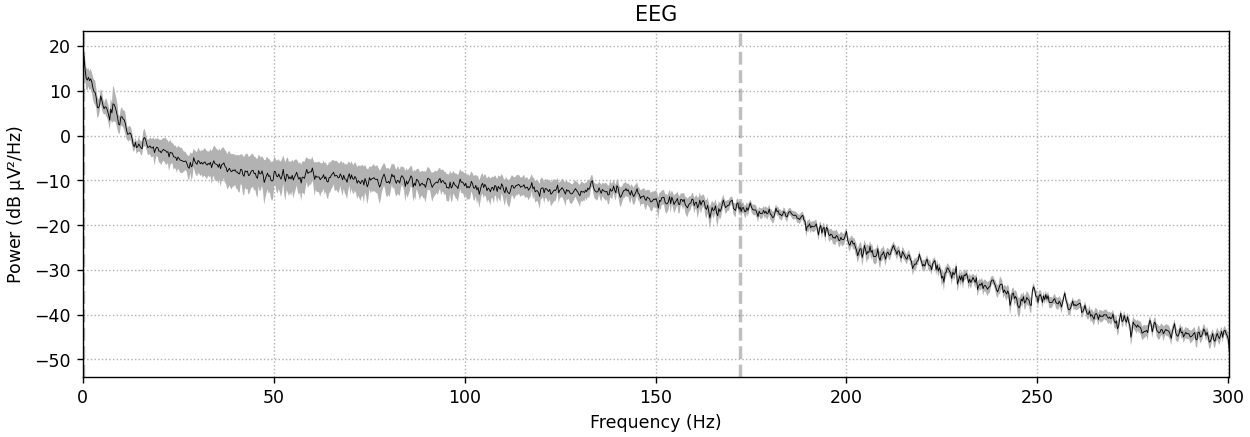

<IPython.core.display.Javascript object>

In [28]:
spectrum = raw.compute_psd()
spectrum.plot(average=True, picks="data", exclude="bads", amplitude=False)

Plotting power spectral density (dB=True).


<IPython.core.display.Javascript object>


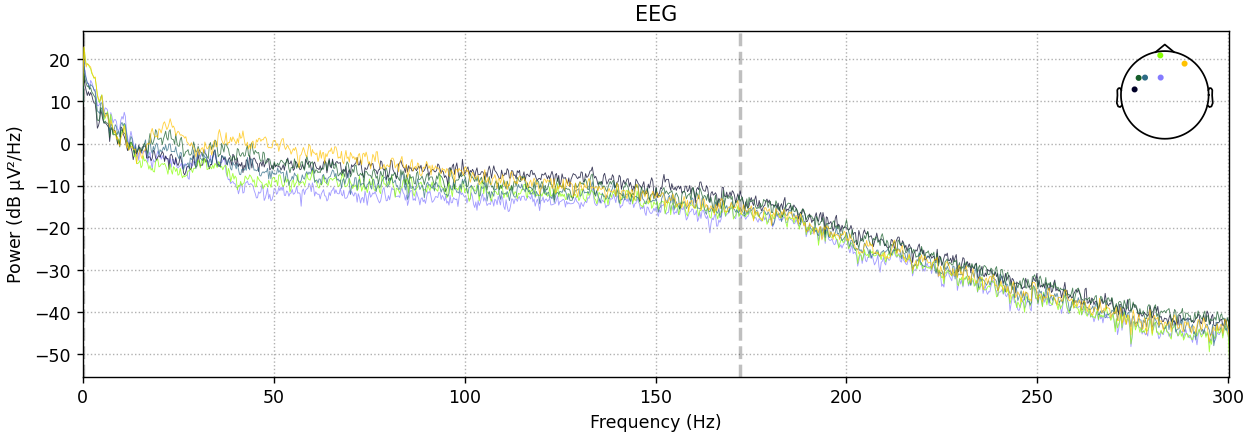

In [29]:
midline = ["EEG 002", "EEG 010", "EEG 012", "EEG 009", "EEG 007", "EEG 019"]
spectrum.plot(picks=midline, exclude="bads", amplitude=False);

In [30]:
# 3D to 2D
spectrum.plot_topomap();


<IPython.core.display.Javascript object>

## Plotting sensor locations from Raw objects

In [31]:
raw.plot_sensors(ch_type="eeg");

<IPython.core.display.Javascript object>

# Artifacts detection 

In [32]:
# Artifacts detection 
ssp_projectors = raw.info["projs"]
raw.del_proj()

<Raw | sample_audvis_raw.fif, 59 x 36038 (60.0 s), ~19.2 MB, data loaded>

# Low-frequency drifts

<IPython.core.display.Javascript object>


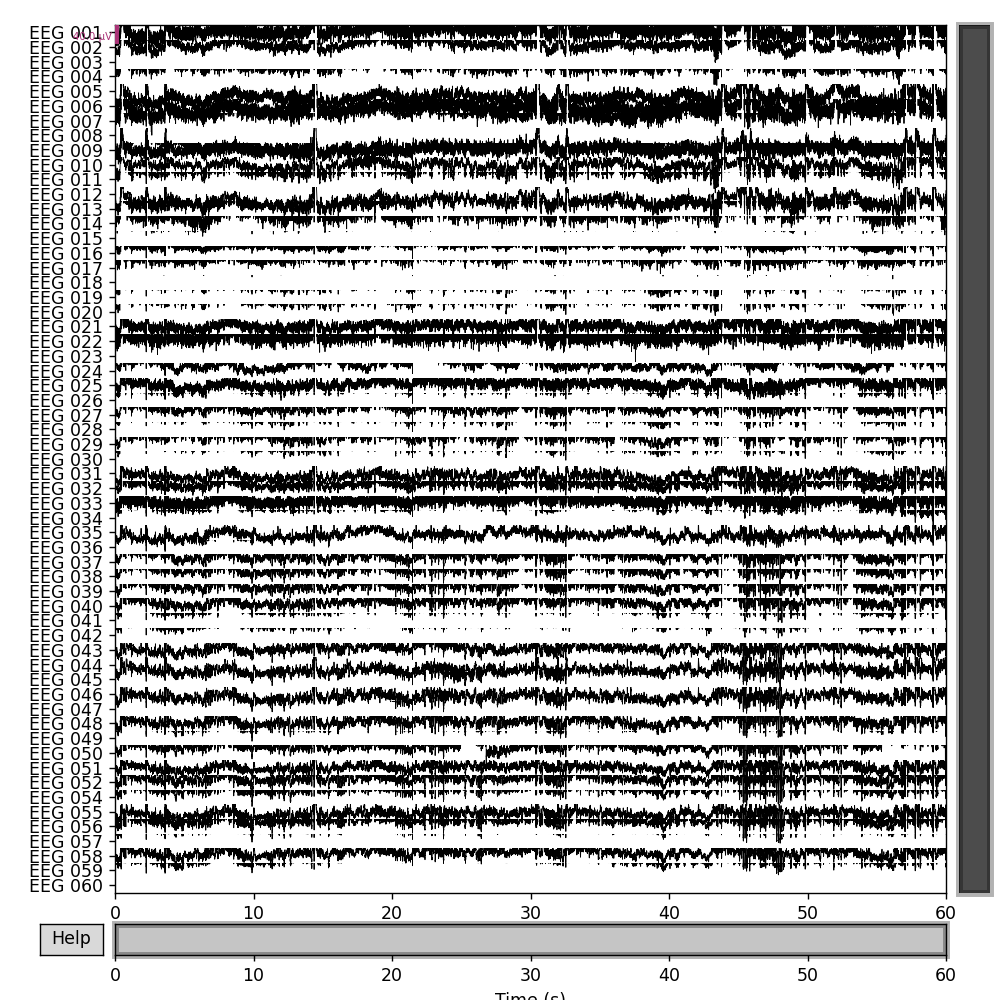

In [33]:
eeg_channels = mne.pick_types(raw.info, eeg=True)
raw.plot(duration=60, order=eeg_channels, n_channels=len(eeg_channels), remove_dc=False);


In [34]:
import os
from copy import deepcopy

import numpy as np

import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(
    sample_data_folder, "MEG", "sample", "sample_audvis_raw.fif"
)
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False)

In [35]:
print(raw.info["bads"])

['MEG 2443', 'EEG 053']


<IPython.core.display.Javascript object>


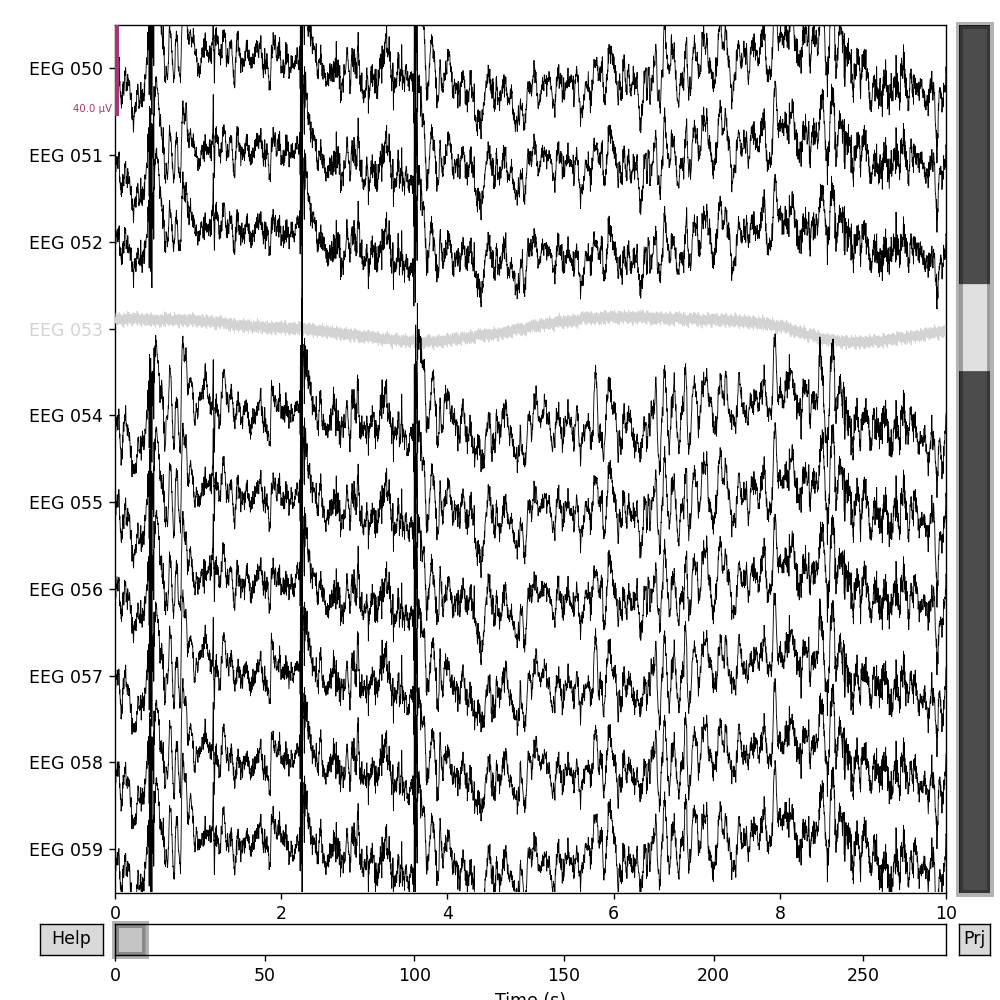

In [36]:
picks = mne.pick_channels_regexp(raw.ch_names, regexp="EEG 05.")
raw.plot(order=picks, n_channels=len(picks));

# Power line noise

Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


<IPython.core.display.Javascript object>


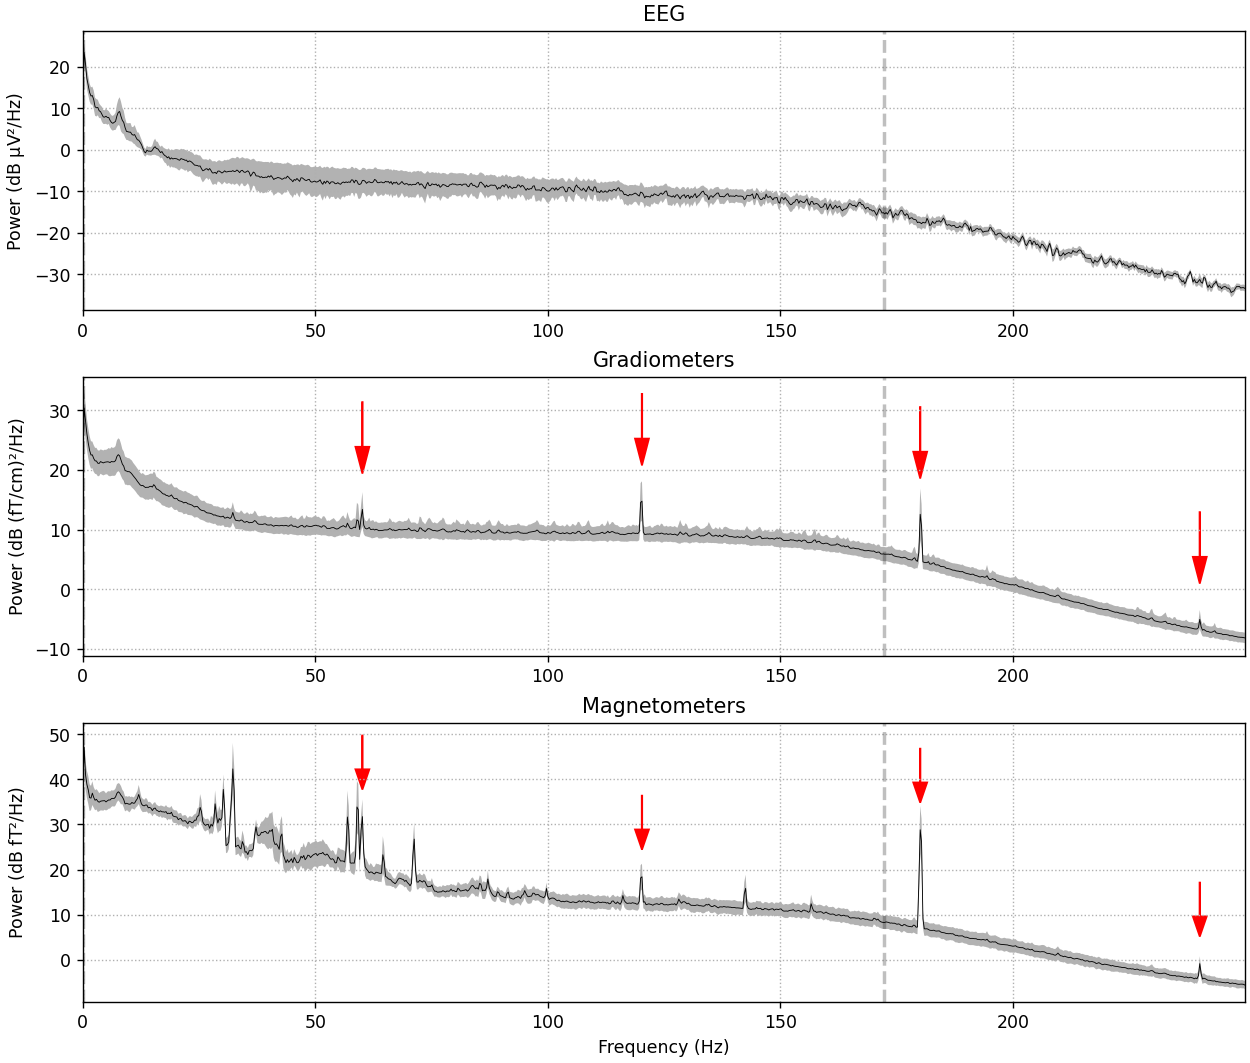

In [37]:
fig = raw.compute_psd(tmax=np.inf, fmax=250).plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)
# add some arrows at 60 Hz and its harmonics:
for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(
            x=freqs[idx],
            y=psds[idx] + 18,
            dx=0,
            dy=-12,
            color="red",
            width=0.1,
            head_width=3,
            length_includes_head=True,
        )

# Heartbeat artifacts (ECG)

In [38]:
#karna hai
#ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
#ecg_epochs.plot_image(combine="mean")

# EOG 

In [39]:
#avg_ecg_epochs = ecg_epochs.average().apply_baseline((-0.5, -0.2))

# Ocular artifacts (EOG)

# Handling bad channels

In [40]:
# making bad channels
print(raw.info["bads"])

['MEG 2443', 'EEG 053']


In [41]:
#picks = mne.pick_channels_regexp(raw.ch_names, regexp="EEG 05.")
#raw.plot(order=picks, n_channels=len(picks))

# Interpolating bad channels

# Annotating bad spans of data

# Rejecting bad data 

# FIR filtring 

## Bandpass Filtering

# Slow Drift 

<IPython.core.display.Javascript object>


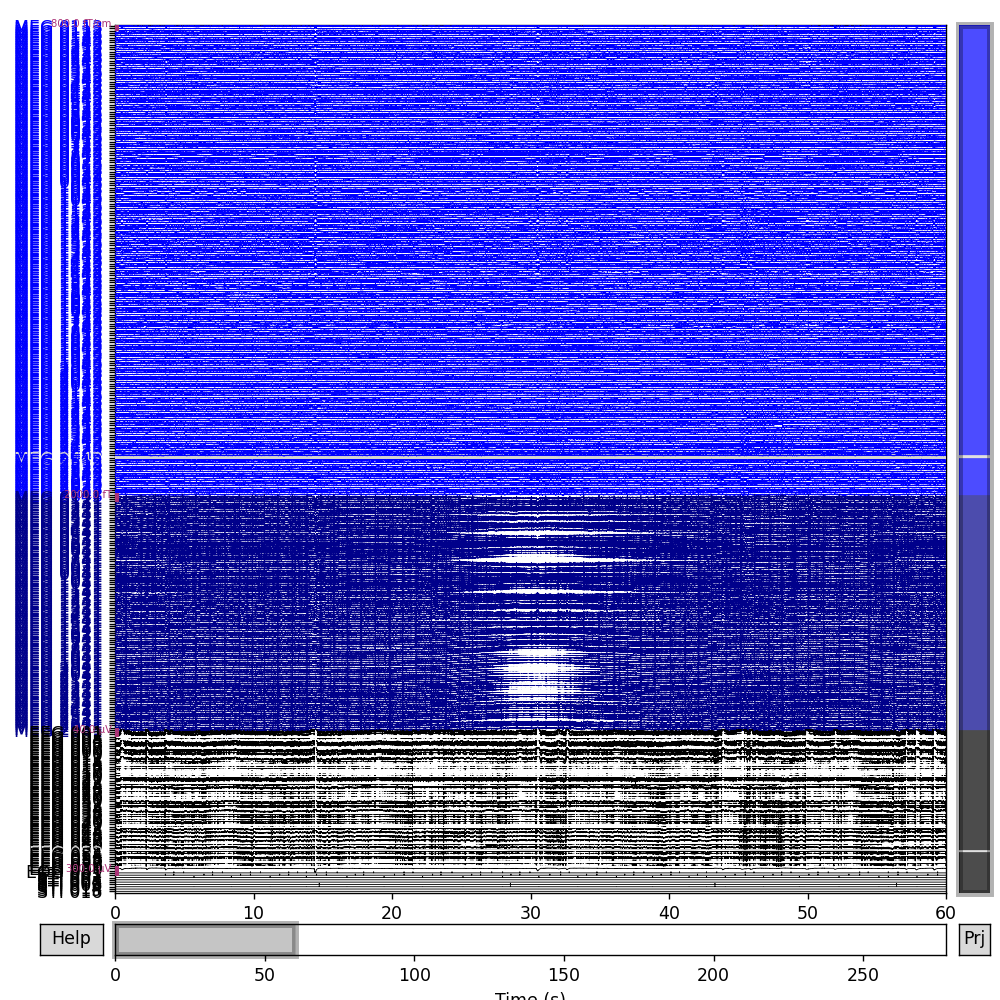

In [42]:

raw.plot(duration=60, proj=False, n_channels=len(raw.ch_names), remove_dc=False);

Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 19821 samples (33.001 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 366 out of 366 | elapsed:    3.8s finished


<IPython.core.display.Javascript object>

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 9911 samples (16.501 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 366 out of 366 | elapsed:    3.1s finished


<IPython.core.display.Javascript object>


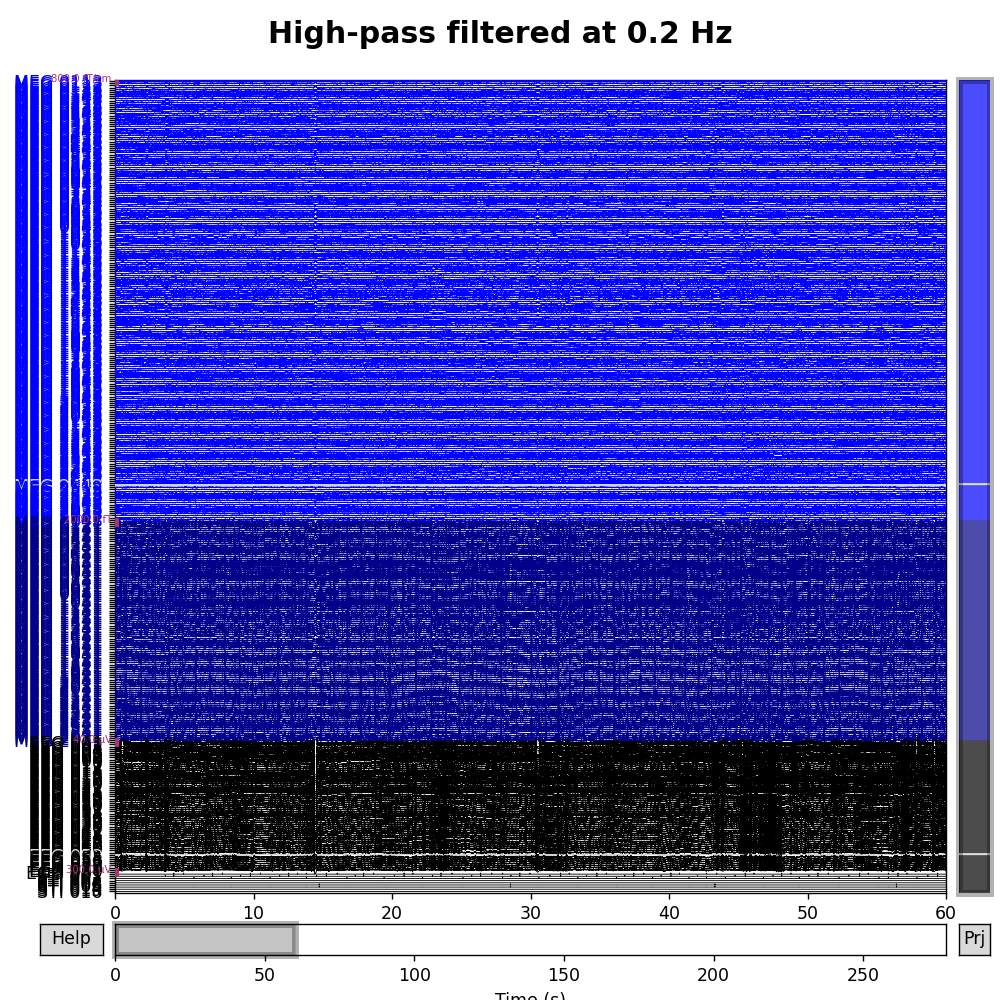

In [43]:
# If you haven't already loaded the data with preload=True, do it now
raw.load_data()

# Now you can apply the high-pass filter and plot
for cutoff in (0.1, 0.2):
    raw_highpass = raw.copy().filter(l_freq=cutoff, h_freq=None)
    with mne.viz.use_browser_backend("matplotlib"):
        fig = raw_highpass.plot(
            duration=60, proj=False, n_channels=len(raw.ch_names), remove_dc=False
        )
    fig.subplots_adjust(top=0.9)
    fig.suptitle(f"High-pass filtered at {cutoff} Hz", size="xx-large", weight="bold")


In [44]:
filter_params = mne.filter.create_filter(
    raw.get_data(), raw.info["sfreq"], l_freq=0.2, h_freq=None
)

Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 9911 samples (16.501 s)



<IPython.core.display.Javascript object>


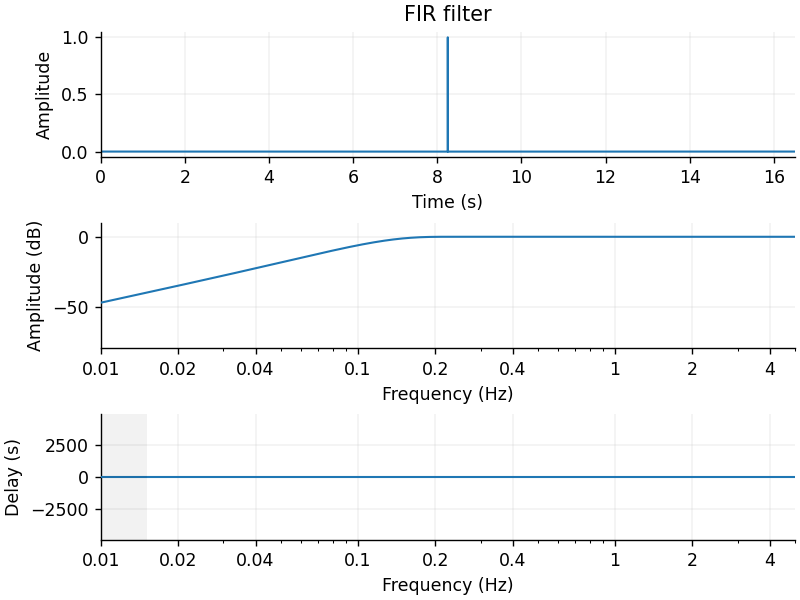

In [50]:
mne.viz.plot_filter(filter_params, raw.info["sfreq"], flim=(0.01, 5));

## Notch Filtering

### Removing  power line noise

Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


<IPython.core.display.Javascript object>


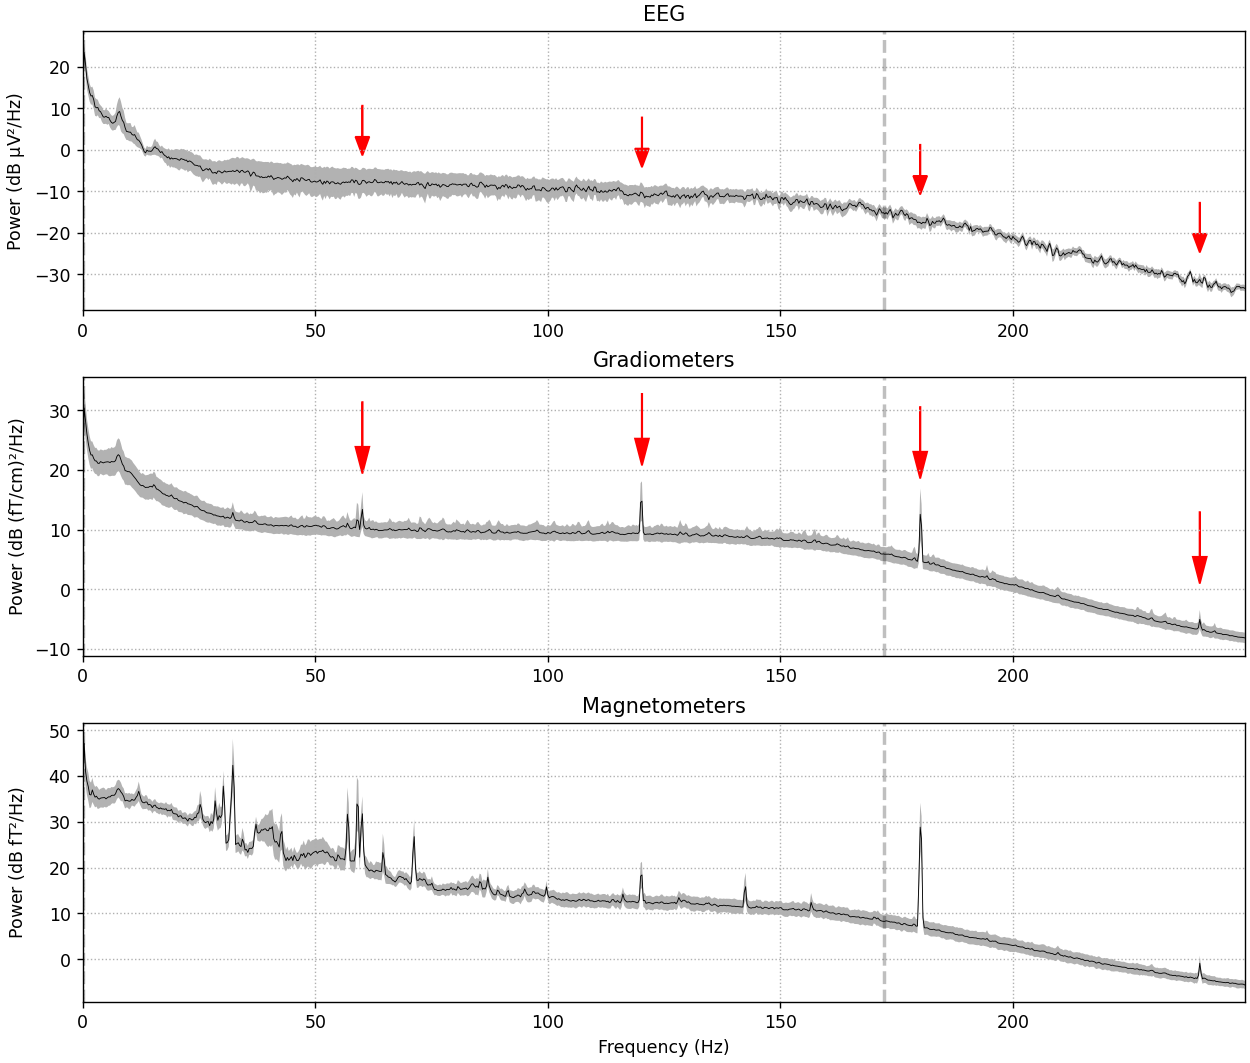

In [46]:
def add_arrows(axes):
    """Add some arrows at 60 Hz and its harmonics."""
    for ax in axes:
        freqs = ax.lines[-1].get_xdata()
        psds = ax.lines[-1].get_ydata()
        for freq in (60, 120, 180, 240):
            idx = np.searchsorted(freqs, freq)
            # get ymax of a small region around the freq. of interest
            y = psds[(idx - 4) : (idx + 5)].max()
            ax.arrow(
                x=freqs[idx],
                y=y + 18,
                dx=0,
                dy=-12,
                color="red",
                width=0.1,
                head_width=3,
                length_includes_head=True,
            )


fig = raw.compute_psd(fmax=250).plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)
add_arrows(fig.axes[:2])

In [51]:
# meg_picks = mne.pick_types(raw.info, meg=True)
# freqs = (60, 120, 180, 240)
# raw_notch = raw.copy().notch_filter(freqs=freqs, picks=meg_picks)
# for title, data in zip(["Un", "Notch "], [raw, raw_notch]):
#     fig = data.compute_psd(fmax=250).plot(
#         average=True, amplitude=False, picks="data", exclude="bads"
#     )
#     fig.suptitle(f"{title}filtered", size="xx-large", weight="bold")
#     add_arrows(fig.axes[:2])

In [52]:
# raw_notch_fit = raw.copy().notch_filter(
#     freqs=freqs, picks=meg_picks, method="spectrum_fit", filter_length="10s"
# )
# for title, data in zip(["Un", "spectrum_fit "], [raw, raw_notch_fit]):
#     fig = data.compute_psd(fmax=250).plot(
#         average=True, amplitude=False, picks="data", exclude="bads"
#     )
#     fig.suptitle(f"{title}filtered", size="xx-large", weight="bold")
#     add_arrows(fig.axes[:2])

# Resampling

320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Polyphase resampling neighborhood: ±2 input samples
320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]


<IPython.core.display.Javascript object>


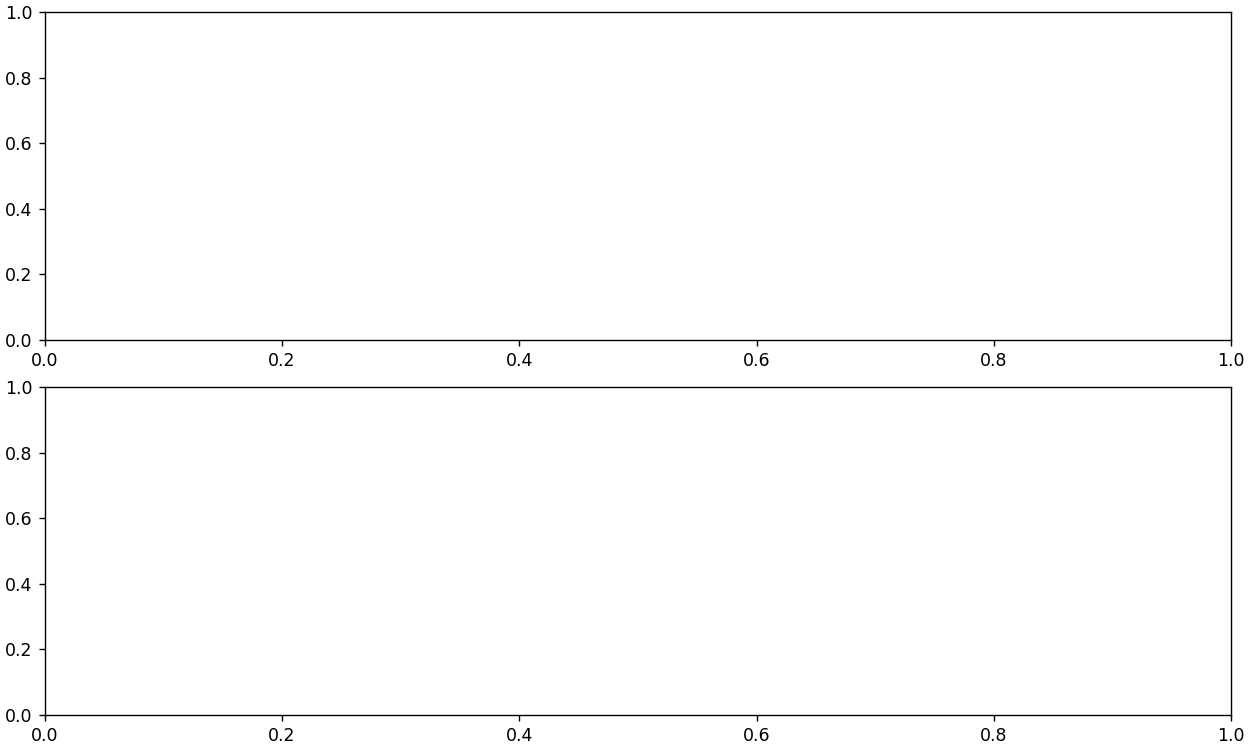

Effective window size : 6.820 (s)
Plotting power spectral density (dB=True).


ValueError: axes must be an array-like of length 3, but the length is 1

In [54]:
n_ffts = [4096, 2048]  # factor of 2 smaller n_fft
raw_downsampled_poly = raw.copy().resample(
    sfreq=raw.info["sfreq"] / 2.0,
    method="polyphase",
    verbose=True,
)
fig, axes = plt.subplots(2, 1, sharey=True, layout="constrained", figsize=(10, 6))
for ax, data, title, n_fft in zip(
    axes, [raw, raw_downsampled_poly], ["Original", "Downsampled (polyphase)"], n_ffts
):
    data.compute_psd(n_fft=n_fft).plot(
        average=True, amplitude=False, picks="data", exclude="bads", axes=ax
    )
    ax.set(title=title, xlim=(0, 300))

In [ ]:
n_ffts = [4096, 2048]  # factor of 2 smaller n_fft
raw_downsampled_poly = raw.copy().resample(
    sfreq=raw.info["sfreq"] / 2.0,
    method="polyphase",
    verbose=True,
)
fig, axes = plt.subplots(2, 1, sharey=True, layout="constrained", figsize=(10, 6))
for ax, data, title, n_fft in zip(
    axes, [raw, raw_downsampled_poly], ["Original", "Downsampled (polyphase)"], n_ffts
):
    data.compute_psd(n_fft=n_fft).plot(
        average=True, amplitude=False, picks="data", exclude="bads", axes=ax
    )
    ax.set(title=title, xlim=(0, 300))

In [ ]:
current_sfreq = raw.info["sfreq"]
desired_sfreq = 90  # Hz
decim = np.round(current_sfreq / desired_sfreq).astype(int)
obtained_sfreq = current_sfreq / decim
lowpass_freq = obtained_sfreq / 3.0

raw_filtered = raw.copy().filter(l_freq=None, h_freq=lowpass_freq)
events = mne.find_events(raw_filtered)
epochs = mne.Epochs(raw_filtered, events, decim=decim)

print(
    "desired sampling frequency was {} Hz; decim factor of {} yielded an "
    "actual sampling frequency of {} Hz.".format(
        desired_sfreq, decim, epochs.info["sfreq"]
    )
)

# Artifact Detection and Removal

In [ ]:
#Prepare the data 
import numpy as np

import mne
from mne.preprocessing import EOGRegression

data_path = mne.datasets.sample.data_path()
raw_fname = data_path / "MEG" / "sample" / "sample_audvis_raw.fif"
raw = mne.io.read_raw_fif(raw_fname)
raw.pick(["eeg", "eog", "stim"])
raw.load_data()

# The regression technique works regardless of chosen reference. However, it is
# important to choose a reference before proceeding with the analysis.
raw.set_eeg_reference("average")

# Removing slow drifts makes for more stable regression coefficients. Make sure
# to apply the same filter to both EEG and EOG channels!
raw.filter(0.3, 40)

# make epochs
events = mne.find_events(raw)
event_id = {"visual/left": 3, "visual/right": 4}
epochs = mne.Epochs(raw, events, event_id=event_id, preload=True)

In [ ]:
# Perform regression using the EOG sensor as independent variable and the EEG
# sensors as dependent variables.
model_plain = EOGRegression(picks="eeg", picks_artifact="eog").fit(epochs)
fig = model_plain.plot(vlim=(None, 0.4))  # regression coefficients as topomap
fig.set_size_inches(3, 2)

# Repairing artifacts with ICA

In [ ]:

from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(
    sample_data_folder, "MEG", "sample", "sample_audvis_filt-0-40_raw.fif"
)
raw = mne.io.read_raw_fif(sample_data_raw_file)

# Here we'll crop to 60 seconds and drop gradiometer channels for speed
raw.crop(tmax=60.0).pick(picks=["mag", "eeg", "stim", "eog"])
raw.load_data()

In [ ]:
# pick some channels that clearly show heartbeats and blinks
regexp = r"(MEG [12][45][123]1|EEG 00.)"
artifact_picks = mne.pick_channels_regexp(raw.ch_names, regexp=regexp)
raw.plot(order=artifact_picks, n_channels=len(artifact_picks), show_scrollbars=False)

In [ ]:
ecg_evoked = create_ecg_epochs(raw).average()
ecg_evoked.apply_baseline(baseline=(None, -0.2))
ecg_evoked.plot_joint()

In [ ]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [ ]:
ica.fit(raw.copy().filter(8, 35))

In [ ]:
    ica.plot_components(outlines='head')


In [ ]:
ica.exclude = [1, 10, 14, 17, 18, 19]

In [ ]:
bad_idx, scores = ica.find_bads_eog(raw, 'SO2', threshold=2)
print(bad_idx)


In [ ]:
raw.plot();

In [ ]:
ica.apply(raw.copy(), exclude=ica.exclude).plot();

In [ ]:
events = mne.find_events(raw)

In [ ]:
events

In [ ]:
mne.viz.plot_events(events[:100]);

In [ ]:
event_ids = {"standard/stimulus": 200, "target/stimulus": 100}

epochs = mne.Epochs(raw, events, event_id=event_ids)

In [ ]:

epochs.plot();

In [ ]:
%matplotlib inline
epochs = ica.apply(epochs, exclude=ica.exclude)